## ISMT S-136 Time Series Analysis with Python, Summer 2021   
### Section 8

## I. ARIMA Models

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

### Generate n Observations of ARIMA(2,0,0), ARIMA(2,1,0), and ARIMA(2,2,0)

In [2]:
# generate n observations of AR(3)
phi =   np.array([1.4, -0.5])
theta = np.array([0])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 5.0
n=80
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




In [3]:
print("xt[0:4]:         ",xt[0:4])
print("xt[0:4].cumsum():",xt[0:4].cumsum())

xt[0:4]:          [-4.89367965 -2.65905107 -4.67700663 -3.17320187]
xt[0:4].cumsum(): [ -4.89367965  -7.55273072 -12.22973735 -15.40293922]


In [4]:
## construct n observations of ARIMA(2,0,0), ARIMA(2,1,0), and ARIMA(2,2,0):

# ARIMA(2,0,0)
xt0 = xt+0.4

# ARIMA(2,1,0)
xt1 = np.r_[0, xt].cumsum()
xt1 = xt1[0:n]

# ARIMA(2,2,0)
xt2 = np.r_[0, xt1+0.0].cumsum()
xt2 = xt2[0:n]

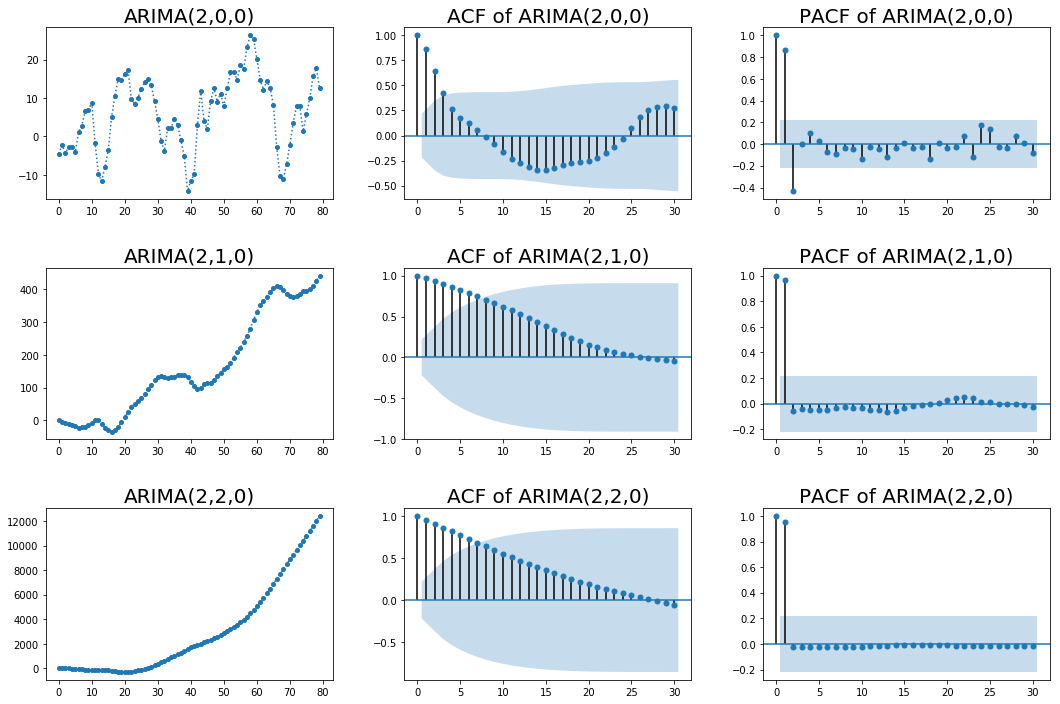

In [5]:
h_max =30

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=False, figsize=(18,12))
plt.subplots_adjust(wspace = 0.25,hspace= 0.4)
ax[0][0].plot(xt0, linestyle=':', marker='o', markersize=4)
ax[1][0].plot(xt1, linestyle=':', marker='o', markersize=4)
ax[2][0].plot(xt2, linestyle=':', marker='o', markersize=4)

plot_acf(xt0, ax=ax[0][1], lags=h_max)
plot_acf(xt1, ax=ax[1][1], lags=h_max)
plot_acf(xt2, ax=ax[2][1], lags=h_max)

plot_pacf(xt0, ax=ax[0][2], method = 'ywm', lags=h_max)
plot_pacf(xt1, ax=ax[1][2], method = 'ywm', lags=h_max)
plot_pacf(xt2, ax=ax[2][2], method = 'ywm', lags=h_max)
         
ax[0][0].set_title("ARIMA(2,0,0)", fontsize=20)
ax[1][0].set_title("ARIMA(2,1,0)", fontsize=20)
ax[2][0].set_title("ARIMA(2,2,0)", fontsize=20)

ax[0][1].set_title("ACF of ARIMA(2,0,0)", fontsize=20)
ax[1][1].set_title("ACF of ARIMA(2,1,0)", fontsize=20)
ax[2][1].set_title("ACF of ARIMA(2,2,0)", fontsize=20)

ax[0][2].set_title("PACF of ARIMA(2,0,0)", fontsize=20)
ax[1][2].set_title("PACF of ARIMA(2,1,0)", fontsize=20)
ax[2][2].set_title("PACF of ARIMA(2,2,0)", fontsize=20)

plt.show()

In [7]:
cases = ["fit AR(2) to ARIMA(2,0,0)",
         "fit AR(1) to ARIMA(2,1,0)",
         "fit AR(1) to ARIMA(2,2,0)",
         "fit ARIMA(2,0,0) to ARIMA(2,0,0)",
         "fit ARIMA(2,1,0) to ARIMA(2,1,0)",
         "fit ARIMA(2,2,0) to ARIMA(2,2,0)"   
        ]

## fit AR(p) model to ARIMA process:

# fit AR(2) to ARIMA(2,0,0)
p = 2
model0 = ARIMA(xt0, order=(p,0,0))
model_fit0 = model0.fit(method='css')
xt_fitted0 = model_fit0.predict()
print("\n\n" + cases[0] + ":\n")
print(model_fit0.summary())

# fit AR(1) to ARIMA(2,1,0)
p = 1
model1 = ARIMA(xt1, order=(p,0,0))
model_fit1 = model1.fit(method='css')
xt_fitted1 = model_fit1.predict()
print("\n\n" + cases[1] + ":\n")
print(model_fit1.summary())

# fit AR(1) to ARIMA(2,2,0)
p = 1
model2 = ARIMA(xt2, order=(p,0,0))
model_fit2 = model2.fit(method='css')
xt_fitted2 = model_fit2.predict()
print("\n\n" + cases[2] + ":\n")
print(model_fit2.summary())


## fit ARIMA model to ARIMA process:

# fit ARIMA(2,0,0) to ARIMA(2,0,0)
p = 2
model3 = ARIMA(xt0, order=(p,0,0))
model_fit3 = model3.fit(method='css')
xt_fitted3 = model_fit3.predict()
print("\n\n" + cases[3] + ":\n")
print(model_fit3.summary())

# fit ARIMA(2,1,0) to ARIMA(2,1,0)
p = 2
model4 = ARIMA(xt1, order=(p,1,0))
model_fit4 = model4.fit(method='css')
xt_fitted4 = model_fit4.predict()
print("\n\n" + cases[4] + ":\n")
print(model_fit4.summary())

# fit ARIMA(2,2,0) to ARIMA(2,2,0)
p = 2
model5 = ARIMA(xt2, order=(p,2,0))
model_fit5 = model5.fit(method='css')
xt_fitted5 = model_fit5.predict()
print("\n\n" + cases[5] + ":\n")
print(model_fit5.summary())




fit AR(2) to ARIMA(2,0,0):

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                     ARMA(2, 0)   Log Likelihood                -219.558
Method:                           css   S.D. of innovations              4.039
Date:                Wed, 21 Jul 2021   AIC                            447.116
Time:                        11:02:45   BIC                            456.543
Sample:                             2   HQIC                           450.889
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4447      2.471      2.608      0.011       1.602      11.287
ar.L1.y        1.2765      0.101     12.630      0.000       1.078       1.475
ar.L2.y       -0.4622 

C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


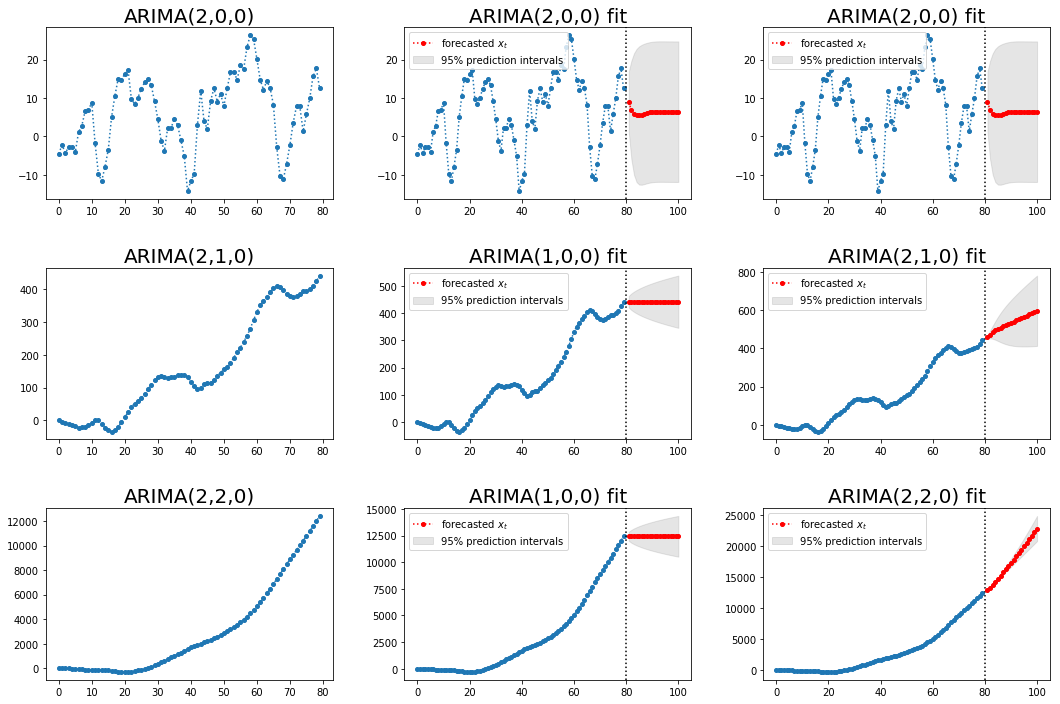

In [8]:
m=20

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=False, figsize=(18,12))
plt.subplots_adjust(wspace = 0.25,hspace= 0.4)

### 1st column --------------------------------------------
ax[0][0].plot(xt0, linestyle=':', marker='o', markersize=4)
ax[1][0].plot(xt1, linestyle=':', marker='o', markersize=4)
ax[2][0].plot(xt2, linestyle=':', marker='o', markersize=4)
         
ax[0][0].set_title("ARIMA(2,0,0)", fontsize=20)
ax[1][0].set_title("ARIMA(2,1,0)", fontsize=20)
ax[2][0].set_title("ARIMA(2,2,0)", fontsize=20)


### 2nd column --------------------------------------------
ax[0][1].plot(xt0, linestyle=':', marker='o', markersize=4)
ax[1][1].plot(xt1, linestyle=':', marker='o', markersize=4)
ax[2][1].plot(xt2, linestyle=':', marker='o', markersize=4)

ax[0][1].set_title("ARIMA(2,0,0) fit", fontsize=20)
ax[1][1].set_title("ARIMA(1,0,0) fit", fontsize=20)
ax[2][1].set_title("ARIMA(1,0,0) fit", fontsize=20)

# AR(2) fit to ARIMA(2,0,0)
[xt_forecasted,std_error,pred_int] = model_fit0.forecast(steps=m, exog=None, alpha=0.05)
ax[0][1].axvline(x=n,linestyle=':',color='k')
ax[0][1].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[0][1].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[0][1].legend(loc = 'upper left')

# AR(1) fit to ARIMA(2,1,0)
[xt_forecasted,std_error,pred_int] = model_fit1.forecast(steps=m, exog=None, alpha=0.05)
ax[1][1].axvline(x=n,linestyle=':',color='k')
ax[1][1].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[1][1].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[1][1].legend(loc = 'upper left')

# AR(1) fit to ARIMA(2,1,0)
[xt_forecasted,std_error,pred_int] = model_fit2.forecast(steps=m, exog=None, alpha=0.05)
ax[2][1].axvline(x=n,linestyle=':',color='k')
ax[2][1].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[2][1].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[2][1].legend(loc = 'upper left')


# 3rd column ----------------------------------------------
ax[0][2].plot(xt0, linestyle=':', marker='o', markersize=4)
ax[1][2].plot(xt1, linestyle=':', marker='o', markersize=4)
ax[2][2].plot(xt2, linestyle=':', marker='o', markersize=4)

ax[0][2].set_title("ARIMA(2,0,0) fit", fontsize=20)
ax[1][2].set_title("ARIMA(2,1,0) fit", fontsize=20)
ax[2][2].set_title("ARIMA(2,2,0) fit", fontsize=20)

# AR(2) fit to ARIMA(2,0,0)
[xt_forecasted,std_error,pred_int] = model_fit3.forecast(steps=m, exog=None, alpha=0.05)
ax[0][2].axvline(x=n,linestyle=':',color='k')
ax[0][2].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[0][2].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[0][2].legend(loc = 'upper left')

# AR(1) fit to ARIMA(2,1,0)
[xt_forecasted,std_error,pred_int] = model_fit4.forecast(steps=m, exog=None, alpha=0.05)
ax[1][2].axvline(x=n,linestyle=':',color='k')
ax[1][2].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[1][2].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[1][2].legend(loc = 'upper left')

# AR(1) fit to ARIMA(2,1,0)
[xt_forecasted,std_error,pred_int] = model_fit5.forecast(steps=m, exog=None, alpha=0.05)
ax[2][2].axvline(x=n,linestyle=':',color='k')
ax[2][2].plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$", markersize=4)
ax[2][2].fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
ax[2][2].legend(loc = 'upper left')


plt.show()

### ARIMA(2,1,0) Process: Residual Analysis

In [9]:
res10 = ARIMA(xt1, order=(1,0,0)).fit(method='css').resid
res20 = ARIMA(xt1, order=(2,0,0)).fit(method='css').resid
res11 = ARIMA(xt1, order=(1,1,0)).fit(method='css').resid
res21 = ARIMA(xt1, order=(2,1,0)).fit(method='css').resid

C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


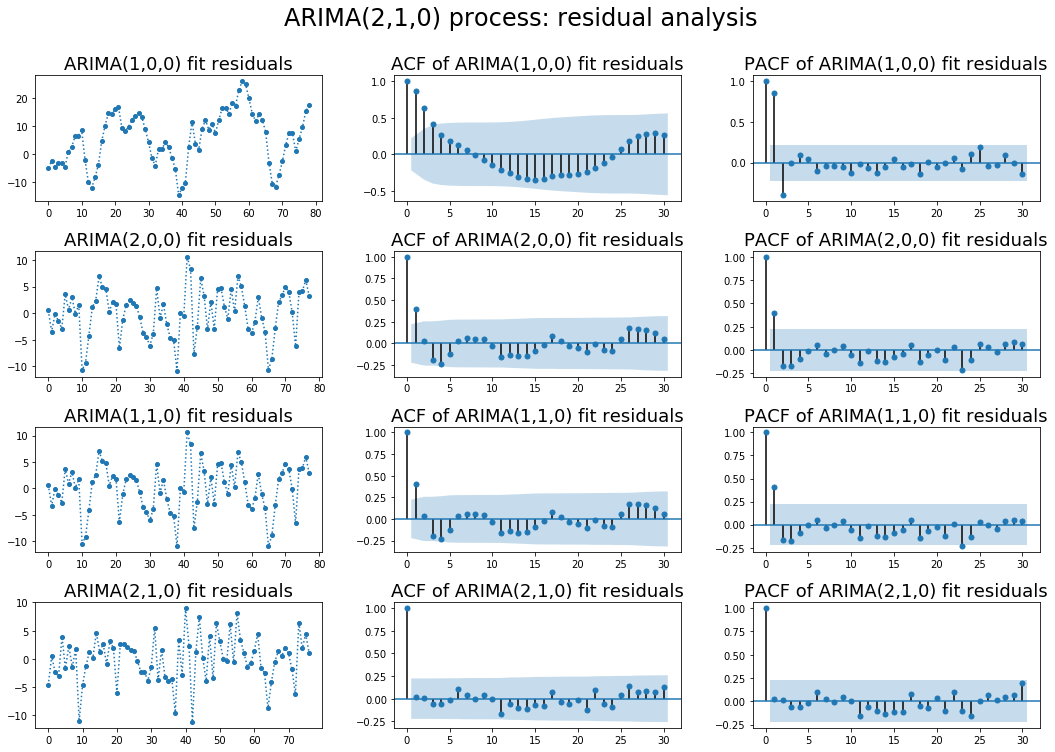

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(18,12))
fig.suptitle('ARIMA(2,1,0) process: residual analysis',y=0.96,size=24)
plt.subplots_adjust(wspace = 0.25,hspace= 0.4)
ax[0][0].plot(res10, linestyle=':', marker='o', markersize=4)
ax[1][0].plot(res20, linestyle=':', marker='o', markersize=4)
ax[2][0].plot(res11, linestyle=':', marker='o', markersize=4)
ax[3][0].plot(res21, linestyle=':', marker='o', markersize=4)

plot_acf(res10, ax=ax[0][1], lags=h_max)
plot_acf(res20, ax=ax[1][1], lags=h_max)
plot_acf(res11, ax=ax[2][1], lags=h_max)
plot_acf(res21, ax=ax[3][1], lags=h_max)

plot_pacf(res10, ax=ax[0][2], method = 'ywm', lags=h_max)
plot_pacf(res20, ax=ax[1][2], method = 'ywm', lags=h_max)
plot_pacf(res11, ax=ax[2][2], method = 'ywm', lags=h_max)
plot_pacf(res21, ax=ax[3][2], method = 'ywm', lags=h_max)
         
ax[0][0].set_title("ARIMA(1,0,0) fit residuals", fontsize=18)
ax[1][0].set_title("ARIMA(2,0,0) fit residuals", fontsize=18)
ax[2][0].set_title("ARIMA(1,1,0) fit residuals", fontsize=18)
ax[3][0].set_title("ARIMA(2,1,0) fit residuals", fontsize=18)

ax[0][1].set_title("ACF of ARIMA(1,0,0) fit residuals", fontsize=18)
ax[1][1].set_title("ACF of ARIMA(2,0,0) fit residuals", fontsize=18)
ax[2][1].set_title("ACF of ARIMA(1,1,0) fit residuals", fontsize=18)
ax[3][1].set_title("ACF of ARIMA(2,1,0) fit residuals", fontsize=18)

ax[0][2].set_title("PACF of ARIMA(1,0,0) fit residuals", fontsize=18)
ax[1][2].set_title("PACF of ARIMA(2,0,0) fit residuals", fontsize=18)
ax[2][2].set_title("PACF of ARIMA(1,1,0) fit residuals", fontsize=18)
ax[3][2].set_title("PACF of ARIMA(2,1,0) fit residuals", fontsize=18)

plt.show()

### Identifying p and q of ARMA(p,q) Process: Residual Analysis

In [11]:
# generate n observations of AR(3)
phi =   np.array([1.4, -0.5])
theta = np.array([-1.2,0.8])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n=800
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




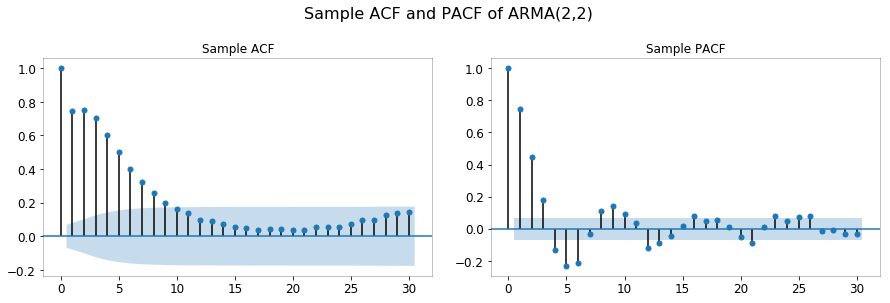

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of ARMA(2,2)',y=1.06,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")   

plt.show()

In [13]:
# estimating parameters of AR(p), p=1,2,3,4, based on the sample run xt of n observations (equivalent to above cell)
p = [0,1,1,1,2,2,2,3]
q = [1,0,1,2,1,2,3,2]
res = [ARIMA(xt, order=(p[case],0,q[case])).fit(method='css').resid for case in range(len(p))]

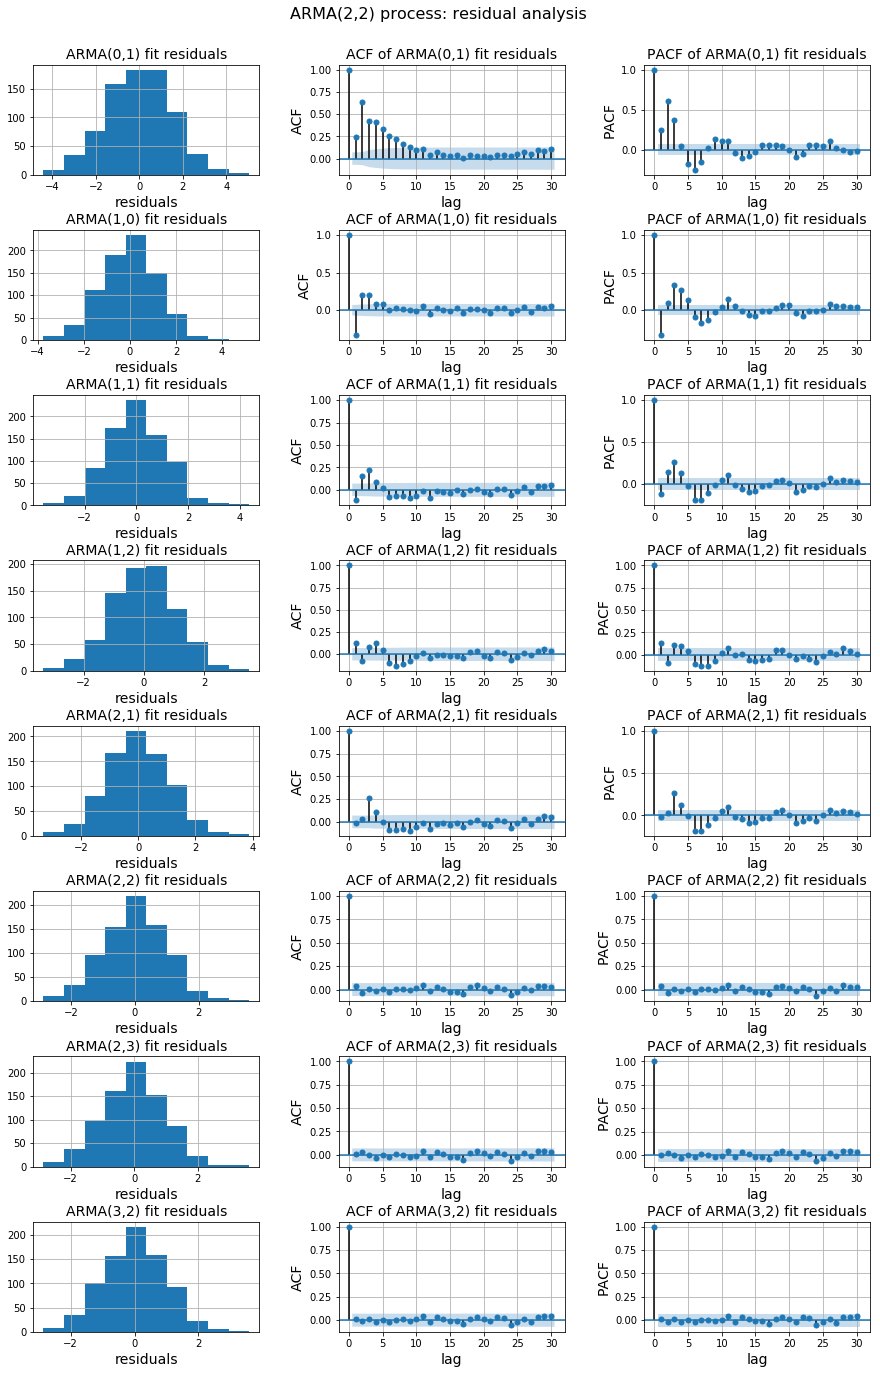

In [14]:
h_max = 30

fig, ax = plt.subplots(nrows=len(p), ncols=3, sharex=False, figsize=(15,20))
fig.suptitle("ARMA(2,2) process: residual analysis",y=0.92,size=16)
plt.subplots_adjust(wspace = 0.35,hspace = 0.5,bottom = 0)

for case in range(len(p)):
    ax[case][0].hist(res[case])
    ax[case][0].set_xlabel("residuals",fontsize=14)
    ax[case][0].set_title("ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][0].grid(True)

    plot_acf(res[case], ax=ax[case][1], lags=h_max)
    ax[case][1].set_xlabel("lag",fontsize=14)
    ax[case][1].set_ylabel("ACF",fontsize=14)
    ax[case][1].set_title("ACF of ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][1].grid(True)
    
    plot_pacf(res[case], ax=ax[case][2], lags=h_max)
    ax[case][2].set_xlabel("lag",fontsize=14)
    ax[case][2].set_ylabel("PACF",fontsize=14)
    ax[case][2].set_title("PACF of ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][2].grid(True)

## II. SARIMA Models

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

### 1. Representing SARIMA$(p,0,q)\times(P,0,Q)_s$ as ARMA

In [18]:
def sarima_to_arma(phi,theta,Phi,Theta,s):
    # this function returns ar/ma polynomial based on s and
    # sets of coefficients phi,theta and seasonal Phi,Theta
    ar = np.r_[1, -phi]
    ma = np.r_[1, theta]
    
    
    ar_seasonal = np.r_[1, -Phi] 
    ma_seasonal = np.r_[1, Theta]
    
    P = len(Phi)
    Q = len(Theta)
    
    for i in reversed(range(1,P+1)):
        ar_seasonal = np.insert(ar_seasonal, i, np.zeros(s-1))
        
    for i in reversed(range(1,Q+1)):
        ma_seasonal = np.insert(ma_seasonal, i, np.zeros(s-1))
        
    return [np.polymul(ar_seasonal,ar), np.polymul(ma_seasonal,ma)]

### Example: SARIMA$(1,0,2)\times(0,0,0)_{7}$

In [20]:
phi = np.array([0.9])
theta = np.array([0.5, 0.2])

s = 7
Phi = np.array([0.])
Theta = np.array([0.])

In [21]:
[ar,ma] = sarima_to_arma(phi,theta,Phi,Theta,s)

print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

coefficients of the autoregressive operator: [ 1.  -0.9  0.   0.   0.   0.   0.   0.   0. ]
coefficients of the moving average operator: [1.  0.5 0.2 0.  0.  0.  0.  0.  0.  0. ]


In [22]:
arma_process = smt.ArmaProcess(ar, ma)

print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True


### Example: SARIMA$(0,0,0)\times(2,0,3)_{7}$

In [23]:
phi = np.array([0.])
theta = np.array([0., 0.])
s = 7

Phi = np.array([1.2, -0.5])
Theta = np.array([0.7, 0.2, 0.1])

In [24]:
[ar,ma] = sarima_to_arma(phi,theta,Phi,Theta,s)

print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

coefficients of the autoregressive operator: [ 1.   0.   0.   0.   0.   0.   0.  -1.2  0.   0.   0.   0.   0.   0.
  0.5  0. ]
coefficients of the moving average operator: [1.  0.  0.  0.  0.  0.  0.  0.7 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.
 0.  0.  0.  0.1 0.  0. ]


In [25]:
arma_process = smt.ArmaProcess(ar, ma)

print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True


### Example: SARIMA$(1,0,2)\times(1,0,0)_{12}$

In [27]:
phi = np.array([0.9])
theta = np.array([0.5, 0.2])

s = 12
Phi = np.array([0.8])
Theta = np.array([0])

In [28]:
[ar,ma] = sarima_to_arma(phi,theta,Phi,Theta,s)
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

coefficients of the autoregressive operator: [ 1.   -0.9   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 -0.8   0.72]
coefficients of the moving average operator: [1.  0.5 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


### 2. Example 3.47 A Mixed Seasonal Model - SARIMA$(0,0,1)\times(1,0,0)_{12}$ 

###  Theoretical Properties of SARIMA$(0,0,1)\times(1,0,0)_{12}$

In [31]:
# SARIMA(0,0,1)x(1,0,0)12

phi = np.array([0])
theta = np.array([-0.5])

s = 12
Phi = np.array([0.8])
Theta = np.array([0])

#ar = np.r_[1, -phi] # no seasonality case
#ma = np.r_[1, theta] # no seasonality case
[ar,ma] = sarima_to_arma(phi,theta,Phi,Theta,s)

In [32]:
sigma = 1

print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.8  0. ]
coefficients of the moving average operator: [ 1.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


In [33]:
p = 0 if ((len(phi)==1) & (phi[0]==0)) else len(phi)
q = 0 if ((len(theta)==1) & (theta[0]==0)) else len(theta)
P = 0 if ((len(Phi)==1) & (Phi[0]==0)) else len(Phi)
Q = 0 if ((len(Theta)==1) & (Theta[0]==0)) else len(Theta)
model_name = "SARIMA(" +str(p)+",0," +str(q)+")x("+str(P)+",0," + str(Q)+")$_{"+str(s)+"}$"

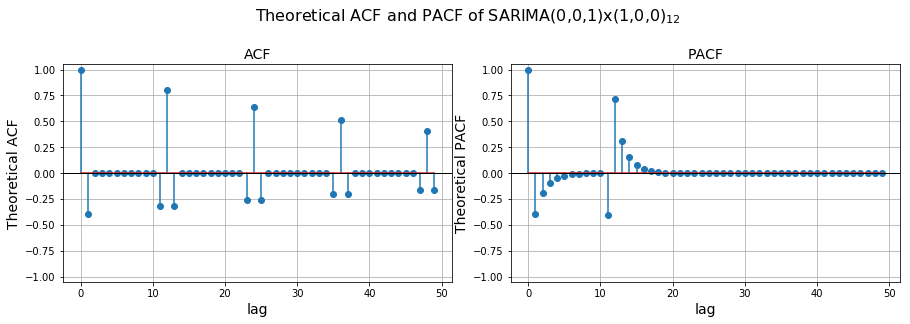

In [34]:
h_max = 50
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

#print("Theoretical ACF of "+ model_name+ ":\n",rho)
#print("\n")
#print("Theoretical ACF of "+ model_name+ ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of '+model_name,y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

#ax[0].plot(rho,linestyle='None',marker='o')
ax[0].stem(rho)
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-1.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

#ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].stem(phi_hh)
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

###  Sample ACF/PACF of SARIMA$(0,0,1)\times(1,0,0)_{12}$

In [35]:
np.random.seed(1678)
sigma = 1.0
n=300
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

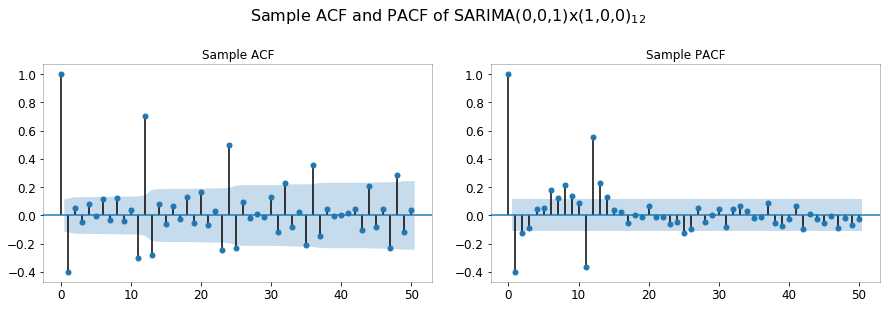

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of '+model_name,y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max, method='ywm')

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")

plt.show()

###  Fitting SARIMA$(0,0,1)\times(1,0,0)_{12}$

In [37]:
model = SARIMAX(xt,
                trend=None,
                order=(0,0,1),
                seasonal_order=(1, 0, 0, 12))

model_fit = model.fit()

print("true coefficients of the autoregressive operator:\n", ar)
print("true coefficients of the moving average operator:\n", ma)
print("true sigma:\n", sigma)

print(model_fit.summary())

true coefficients of the autoregressive operator:
 [ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.8  0. ]
true coefficients of the moving average operator:
 [ 1.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
true sigma:
 1.0
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -409.886
Date:                            Wed, 21 Jul 2021   AIC                            825.773
Time:                                    11:10:54   BIC                            836.884
Sample:                                         0   HQIC                           830.219
                                            - 300                                         
Covariance Type:                              opg                                         
         

###  Residual Diagnostics of SARIMA$(0,0,1)\times(1,0,0)_{12}$ Model

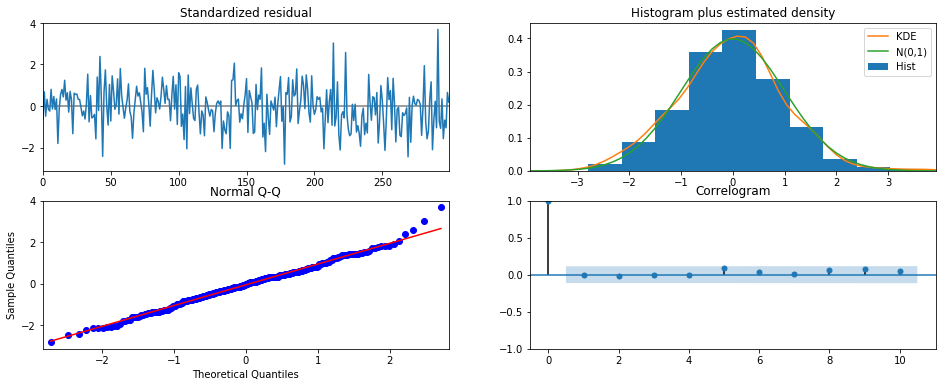

In [38]:
model_fit.plot_diagnostics(figsize=(16, 6))
plt.show()

###  Forecasting with SARIMA$(0,0,1)\times(1,0,0)_{12}$ Model

(200, 311)

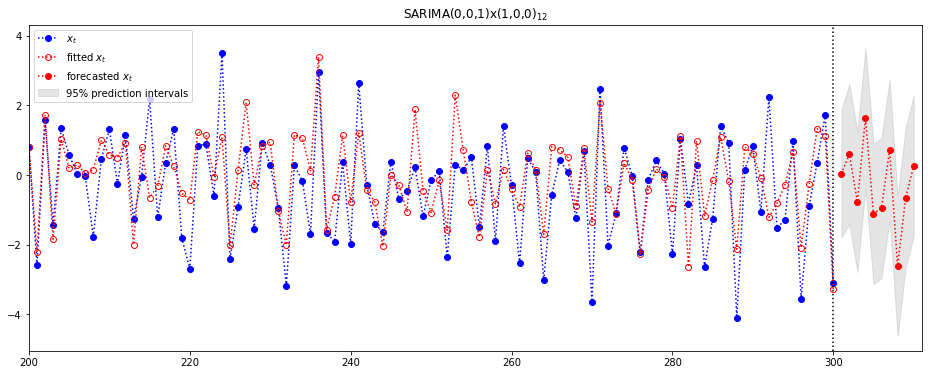

In [40]:
# check n fitted values

xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")
plt.title("SARIMA(" +str(p)+",0," +str(q)+")x("+str(P)+",0," + str(Q)+")$_{"+str(s)+"}$")

# forecast m steps ahead starting from n+1
m=10
#xt_forecasted = model_fit.forecast(steps=m, exog=None, alpha=0.05)
forecast_results = model_fit.get_forecast(steps=m)
xt_forecasted = forecast_results.predicted_mean
pred_int = forecast_results.conf_int()
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

plt.xlim(n-100,n+m+1)

### 3. Example: SARIMA$(2,0,1)\times(1,0,0)_{12}$ 

In [41]:
# SARIMA(2,0,1)x(1,0,0)12

phi = np.array([1.2, -0.7])
theta = np.array([-0.9])

s = 12
Phi = np.array([0.8])
Theta = np.array([0])

#ar = np.r_[1, -phi] # no seasonality case
#ma = np.r_[1, theta] # no seasonality case
[ar,ma] = sarima_to_arma(phi,theta,Phi,Theta,s)

In [42]:
sigma = 1

print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [ 1.   -1.2   0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.
 -0.8   0.96 -0.56]
coefficients of the moving average operator: [ 1.  -0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


In [43]:
p = 0 if ((len(phi)==1) & (phi[0]==0)) else len(phi)
q = 0 if ((len(theta)==1) & (theta[0]==0)) else len(theta)
P = 0 if ((len(Phi)==1) & (Phi[0]==0)) else len(Phi)
Q = 0 if ((len(Theta)==1) & (Theta[0]==0)) else len(Theta)
model_name = "SARIMA(" +str(p)+",0," +str(q)+")x("+str(P)+",0," + str(Q)+")$_{"+str(s)+"}$"

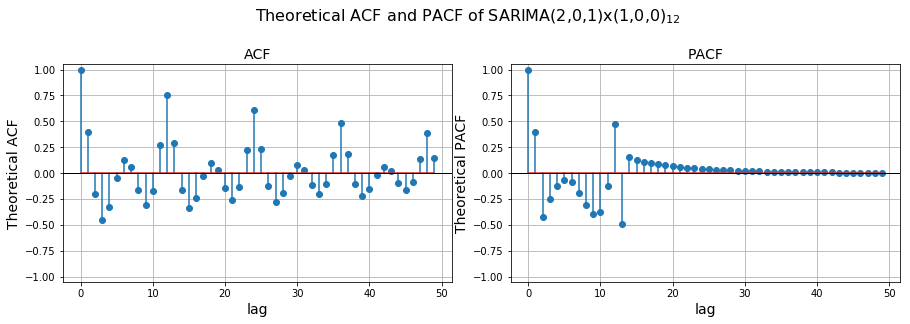

In [44]:
h_max = 50
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

#print("Theoretical ACF of "+ model_name+ ":\n",rho)
#print("\n")
#print("Theoretical ACF of "+ model_name+ ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of '+model_name,y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

#ax[0].plot(rho,linestyle='None',marker='o')
ax[0].stem(rho)
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-1.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

#ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].stem(phi_hh)
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

In [45]:
np.random.seed(1678)
sigma = 1.0
n=400
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

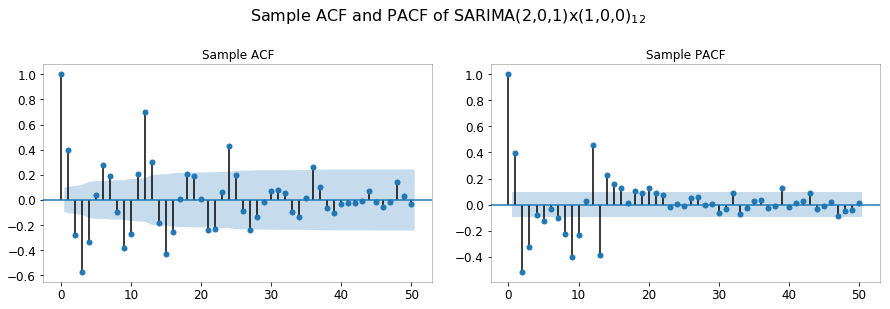

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of '+model_name,y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max, method='ywm')

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")

plt.show()

In [47]:
# estimating parameters of SARIMA(p,0,q)x(1,0,0)12, p=1,2,3,4, based on the sample run xt of n observations (equivalent to above cell)
p = [0,1,1,1,2,2,2,3]
q = [1,0,1,2,1,2,3,2]
res = [SARIMAX(xt,trend=None,order=(p[case],0,q[case]),seasonal_order=(1, 0, 0, 12),enforce_stationarity=False).fit().resid for case in range(len(p))]

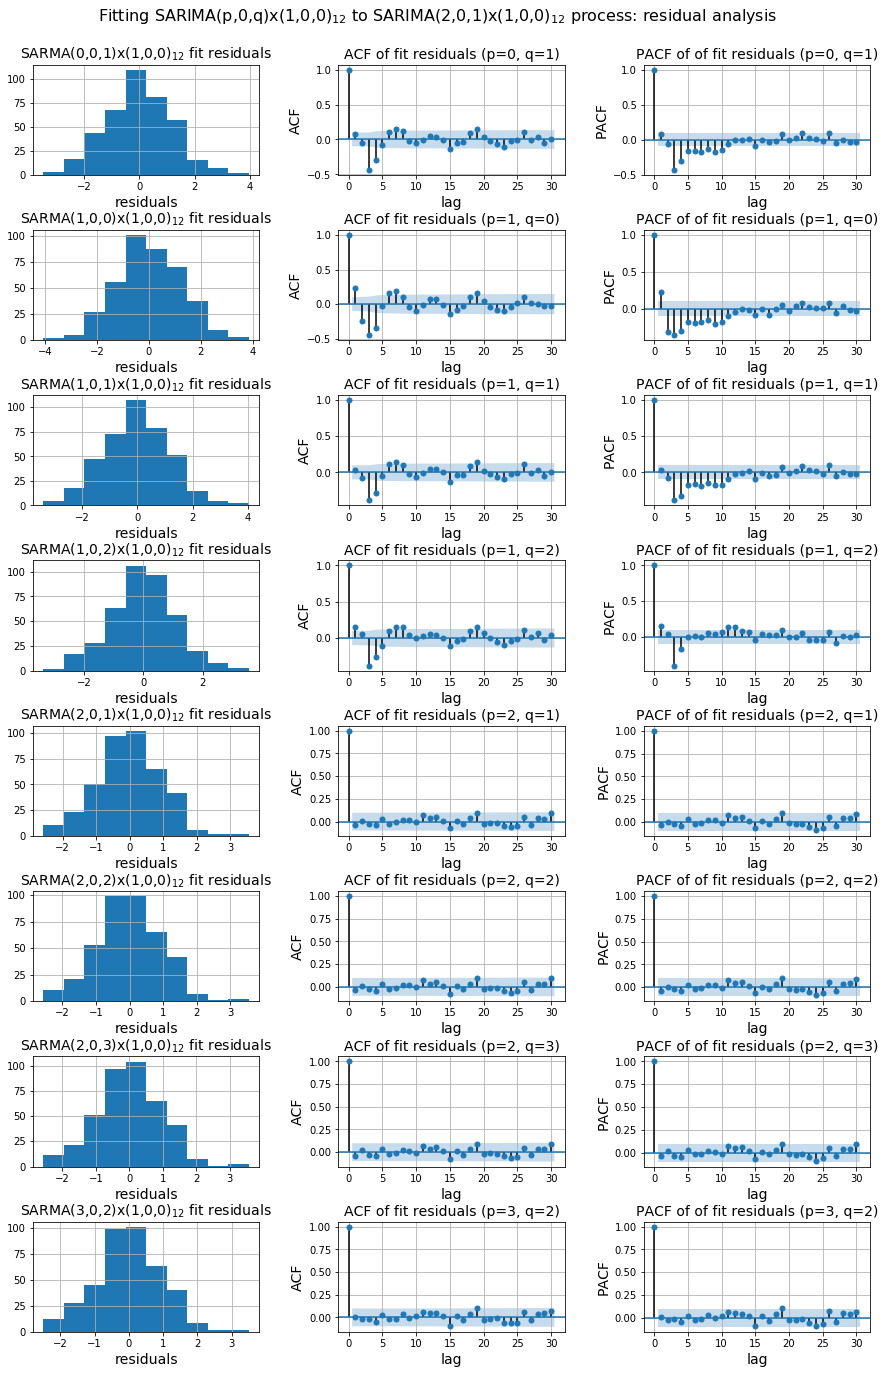

In [48]:
h_max = 30

fig, ax = plt.subplots(nrows=len(p), ncols=3, sharex=False, figsize=(15,20))
fig.suptitle("Fitting SARIMA(p,0,q)x(1,0,0)$_{12}$ to SARIMA(2,0,1)x(1,0,0)$_{12}$ process: residual analysis",
             y=0.92,size=16)
plt.subplots_adjust(wspace = 0.35,hspace = 0.5,bottom = 0)

for case in range(len(p)):
    ax[case][0].hist(res[case])
    ax[case][0].set_xlabel("residuals",fontsize=14)
    ax[case][0].set_title("SARMA("+str(p[case])+",0,"+str(q[case])+")x(1,0,0)$_{12}$ fit residuals",fontsize=14)
    ax[case][0].grid(True)

    plot_acf(res[case], ax=ax[case][1], lags=h_max)
    ax[case][1].set_xlabel("lag",fontsize=14)
    ax[case][1].set_ylabel("ACF",fontsize=14)
    ax[case][1].set_title("ACF of fit residuals (p="+str(p[case])+", q="+str(q[case])+")",fontsize=14)
    ax[case][1].grid(True)
    
    plot_pacf(res[case], ax=ax[case][2], lags=h_max)
    ax[case][2].set_xlabel("lag",fontsize=14)
    ax[case][2].set_ylabel("PACF",fontsize=14)
    ax[case][2].set_title("PACF of of fit residuals (p="+str(p[case])+", q="+str(q[case])+")",fontsize=14)
    ax[case][2].grid(True)

In [49]:
model = SARIMAX(xt,
                trend=None,
                order=(2,0,1),
                seasonal_order=(1, 0, 0, 12))

model_fit = model.fit()

print("true coefficients of the autoregressive operator:\n", ar)
print("true coefficients of the moving average operator:\n", ma)
print("true sigma:\n", sigma)

print(model_fit.summary())

true coefficients of the autoregressive operator:
 [ 1.   -1.2   0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.
 -0.8   0.96 -0.56]
true coefficients of the moving average operator:
 [ 1.  -0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
true sigma:
 1.0
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  400
Model:             SARIMAX(2, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -548.103
Date:                            Wed, 21 Jul 2021   AIC                           1106.205
Time:                                    11:13:47   BIC                           1126.162
Sample:                                         0   HQIC                          1114.108
                                            - 400                                         
Covariance Type:                              opg                                

In [50]:
p = 0 if ((len(phi)==1) & (phi[0]==0)) else len(phi)
q = 0 if ((len(theta)==1) & (theta[0]==0)) else len(theta)
P = 0 if ((len(Phi)==1) & (Phi[0]==0)) else len(Phi)
Q = 0 if ((len(Theta)==1) & (Theta[0]==0)) else len(Theta)
model_name = "SARIMA(" +str(p)+",0," +str(q)+")x("+str(P)+",0," + str(Q)+")$_{"+str(s)+"}$"

(300, 411)

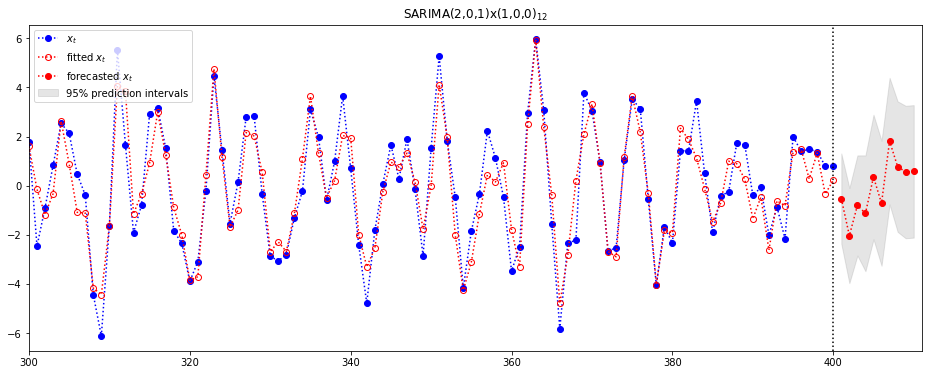

In [51]:
# check n fitted values

xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")
plt.title("SARIMA(" +str(p)+",0," +str(q)+")x("+str(P)+",0," + str(Q)+")$_{"+str(s)+"}$")

# forecast m steps ahead starting from n+1
m=10
#xt_forecasted = model_fit.forecast(steps=m, exog=None, alpha=0.05)
forecast_results = model_fit.get_forecast(steps=m)
xt_forecasted = forecast_results.predicted_mean
pred_int = forecast_results.conf_int()
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

plt.xlim(n-100,n+m+1)